# Import Packages

In [6]:
import os
import sys

# Determine the project root directory (adjust the path as necessary)
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../../..'))
print(project_root)
sys.path.append(project_root)

#Economic Environment
from price_simulator.src.algorithm.demand import MarketDemandStrategy, LogitDemand, PrisonersDilemmaDemand
from price_simulator.src.algorithm.environment import DiscreteSynchronEnvironment
#RL Environment
from price_simulator.src.algorithm.policies import EpsilonGreedy, ExplorationStrategy, DecreasingEpsilonGreedy
from price_simulator.src.algorithm.agents.simple import AgentStrategy, AlwaysDefectAgent, AlwaysMaxAgent, RandomAgent
from price_simulator.src.algorithm.agents.tabular import Qlearning
#from price_simulator.src.algorithm.agents.approximate import DiffDQN
from price_simulator.src.algorithm.agents.lstm_agent import LSTMReplayAgent
#Analyiser
import price_simulator.src.utils.analyzer as Analyzer
import price_simulator.src.utils.visualizer as Visualizer

c:\Users\Thomas Gausmann\sciebo - Gausmann, Thomas (t_gaus04@uni-muenster.de)@uni-muenster.sciebo.de\Masterarbeit\price_simulator


# Test Other Agents

Period 0/1000
Period 100/1000
Period 200/1000
Period 300/1000
Period 400/1000
Period 500/1000
Period 600/1000
Period 700/1000
Period 800/1000
Period 900/1000
Agent                                                                                            Average Price    Nash Price    Monopoly Price    Average Profit Gain    Nash Profit    Monopoly Profit
---------------------------------------------------------------------------------------------  ---------------  ------------  ----------------  ---------------------  -------------  -----------------
Qlearning (gamma: 0.95, alpha: 0.025, policy: DecreasingEpsilonGreedy, quality: 2.0, mc: 1.0)          1.6233        1.47293           1.92498               1.70749        0.222927            0.33749
AlwaysMaxAgent                                                                                         1.97019       1.47293           1.92498              -0.498843       0.222927            0.33749
Loss history attribute not found for Agent

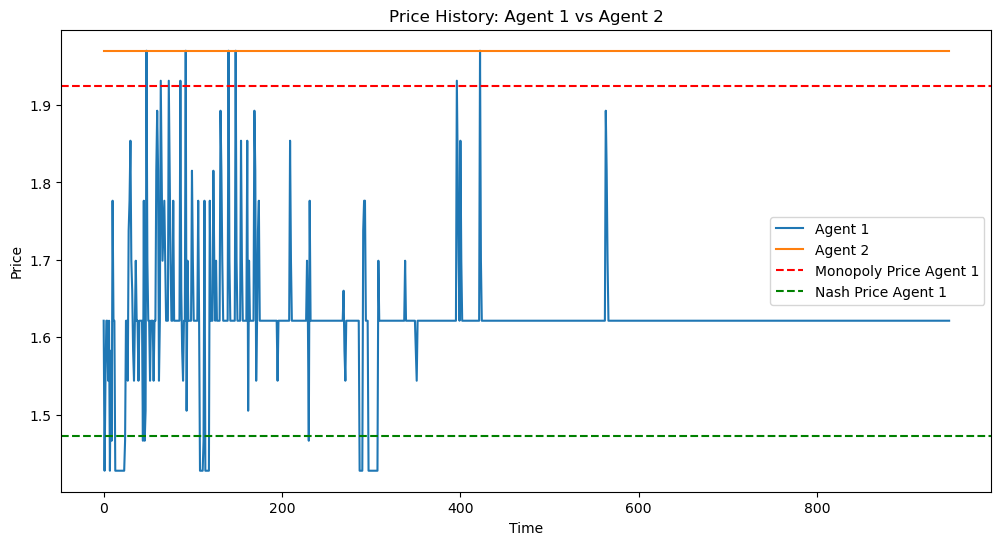

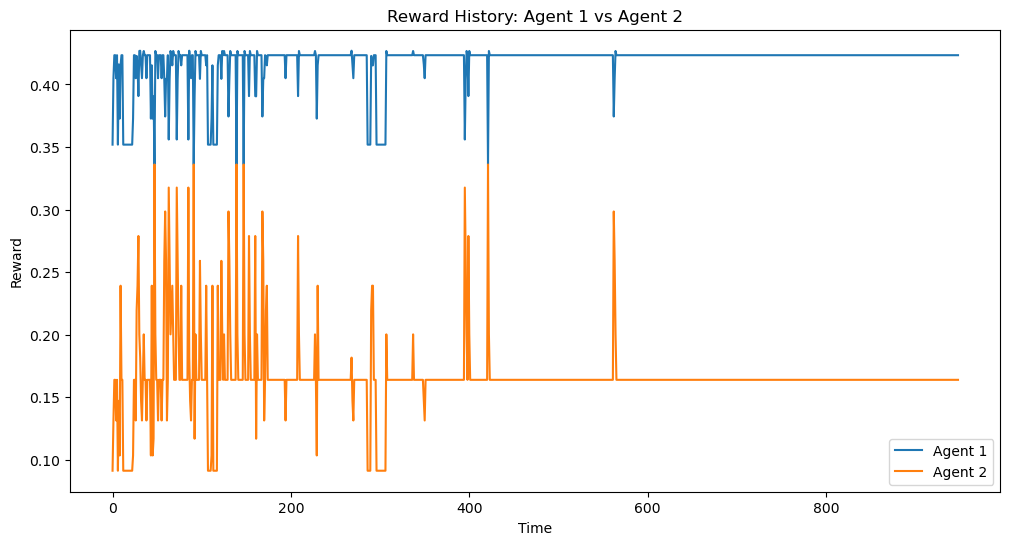

In [3]:
def run():
    env = DiscreteSynchronEnvironment(
        markup=0.1,
        n_periods=1000,
        possible_prices=[],
        n_prices=15,
        demand=LogitDemand(outside_quality=0.0, price_sensitivity=0.25),
        history_after=50,
        agents=[
            Qlearning(
                discount=0.95, learning_rate=0.025, decision=DecreasingEpsilonGreedy(), marginal_cost=1.0, quality=2.0,
            ),
            AlwaysMaxAgent(),
        ],
    )
    env.play_game()
    Analyzer.analyze(env)
    Visualizer.visualize_results(env)

run()

# Test LSTMReplayAgent

Period 0/10000
Period 2500/10000
Period 5000/10000
Period 7500/10000
Agent                                                                                                  Average Price    Nash Price    Monopoly Price    Average Profit Gain    Nash Profit    Monopoly Profit
---------------------------------------------------------------------------------------------------  ---------------  ------------  ----------------  ---------------------  -------------  -----------------
LSTMReplayAgent (gamma: 0.95, alpha: 0.001, policy: DecreasingEpsilonGreedy, quality: 2.0, mc: 1.0)          1.53752       1.47293           1.92498               0.149502       0.222927            0.33749
LSTMReplayAgent (gamma: 0.95, alpha: 0.001, policy: DecreasingEpsilonGreedy, quality: 2.0, mc: 1.0)          1.53349       1.47293           1.92498               0.166121       0.222927            0.33749


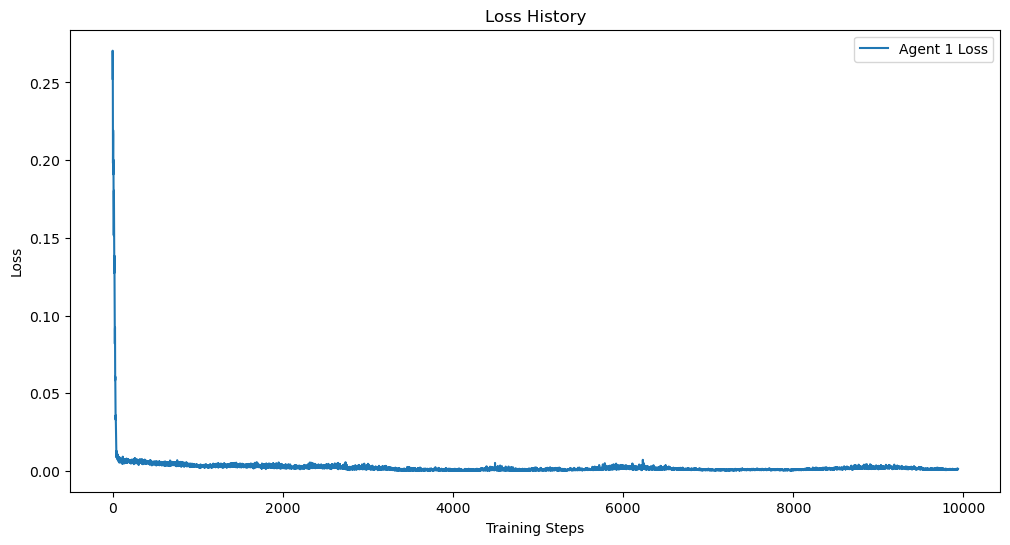

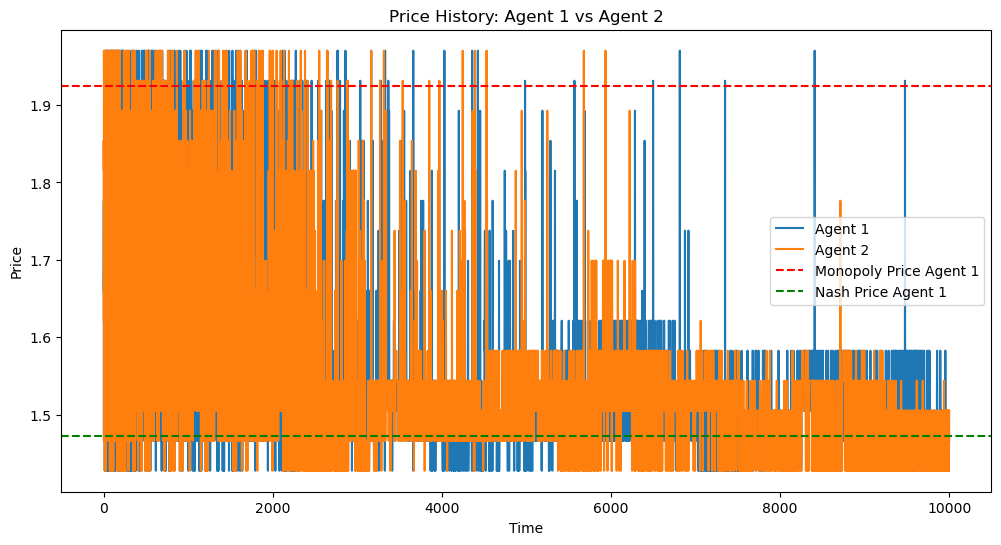

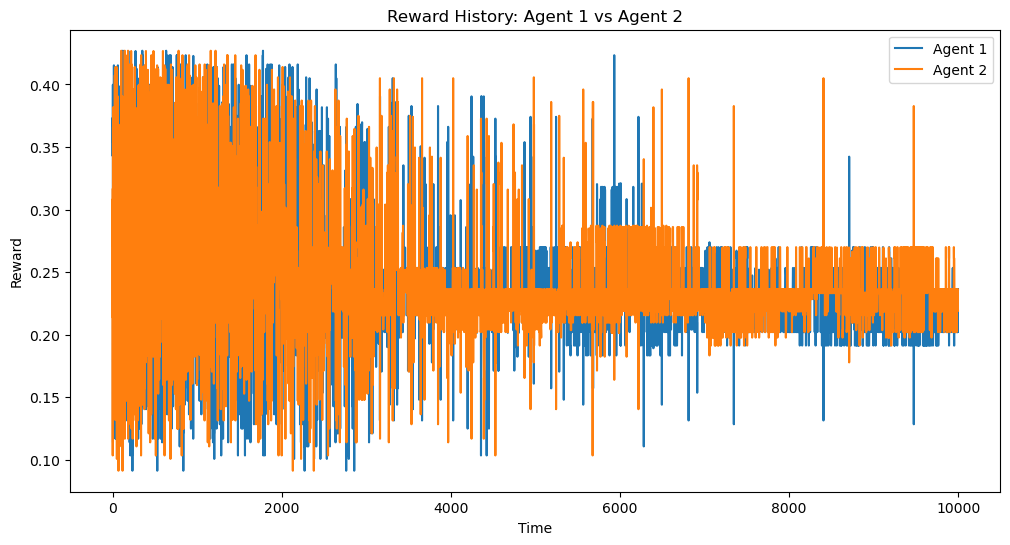

In [52]:
def run():
    env = DiscreteSynchronEnvironment(
        markup=0.1,
        n_periods=10000,
        possible_prices=[],
        n_prices=15,
        demand=LogitDemand(outside_quality=0.0, price_sensitivity=0.25),
        history_after=0,
        agents=[
			LSTMReplayAgent(
				discount=0.95,
				learning_rate=0.001,
				decision=DecreasingEpsilonGreedy(),
				marginal_cost=1.0,
				quality=2.0,
				sequence_length=15,
				batch_size=64,
				use_soft_update=True,
				TAU=0.001,
				replay_buffer_capacity=400,
			),
			LSTMReplayAgent(
				discount=0.95,
				learning_rate=0.001,
				decision=DecreasingEpsilonGreedy(),
				marginal_cost=1.0,
				quality=2.0,
				sequence_length=15,
				batch_size=64,
				use_soft_update=True,
				TAU=0.001,
				replay_buffer_capacity=400,
			),
        ],
    )
    env.play_game()
    Analyzer.analyze(env)
    Visualizer.visualize_results(env, showAgent1=True, showAgent2=True)

run()

In [12]:
from price_simulator.src.utils.serializer import save_object

def run_multiple_simulations(n_runs=10, output_file="simulation_histories.pkl"):
    all_histories = {
        "prices": {},
        "quantities": {},
        "rewards": {}
    }

    for i in range(n_runs):
        print(f"Running simulation {i + 1}/{n_runs}...")

        # Set up the environment
        env = DiscreteSynchronEnvironment(
            markup=0.1,
            n_periods=1000,
            possible_prices=[],
            n_prices=15,
            demand=LogitDemand(outside_quality=0.0, price_sensitivity=0.25),
            history_after=0,
            agents=[
                LSTMReplayAgent(
                    discount=0.95,
                    learning_rate=0.001,
                    decision=DecreasingEpsilonGreedy(),
                    marginal_cost=1.0,
                    quality=2.0,
                    sequence_length=5,
                    batch_size=64,
                    use_soft_update=True,
                    TAU=0.001,
                    debug=False,
                    replay_buffer_capacity=200,
                ),
                LSTMReplayAgent(
                    discount=0.95,
                    learning_rate=0.001,
                    decision=DecreasingEpsilonGreedy(),
                    marginal_cost=1.0,
                    quality=2.0,
                    sequence_length=5,
                    batch_size=64,
                    use_soft_update=True,
                    TAU=0.001,
                    debug=False,
                    replay_buffer_capacity=200,
                ),
            ],
        )

        # Run the simulation
        env.play_game()

        # Collect histories with run identifiers
        all_histories["prices"][f"run_{i + 1}"] = env.price_history
        all_histories["quantities"][f"run_{i + 1}"] = env.quantity_history
        all_histories["rewards"][f"run_{i + 1}"] = env.reward_history

    # Save all histories to a file
    save_object(all_histories, output_file)
    print(f"Simulation histories saved to {output_file}")

In [15]:
run_multiple_simulations(n_runs=100, output_file="simulation_histories.pkl")

Running simulation 1/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 2/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 3/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 4/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 5/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 6/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 7/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 8/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 9/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 10/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running simulation 11/100...
Period 0/1000
Period 250/1000
Period 500/1000
Period 750/1000
Running 

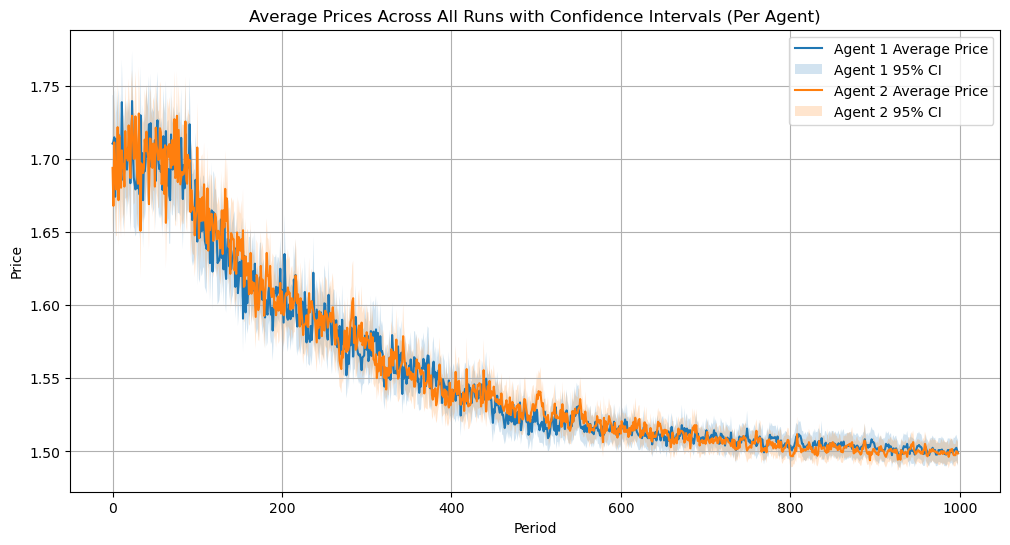

In [29]:
from price_simulator.src.utils.serializer import load_object
import numpy as np
import matplotlib.pyplot as plt

# Load the simulation histories
file_path = "simulation_histories.pkl"
histories = load_object(file_path)

# Extract price data
prices = histories["prices"]

# Convert price data to a 3D numpy array (runs x periods x agents)
all_prices = np.array(list(prices.values()))

# Ensure all_prices is 3D
if all_prices.ndim != 3:
    raise ValueError("Expected 'all_prices' to be a 3D array (runs x periods x agents).")

# Number of agents
n_agents = all_prices.shape[2]

# Plot average prices with confidence intervals for each agent
plt.figure(figsize=(12, 6))

for agent_idx in range(n_agents):
    # Extract prices for the current agent
    agent_prices = all_prices[:, :, agent_idx]  # Shape: (runs x periods)

    # Calculate average prices for each period across all runs
    average_prices = np.mean(agent_prices, axis=0)

    # Calculate the 95% confidence interval
    # CI = 1.96 * (standard deviation / sqrt(number of runs))
    std_prices = np.std(agent_prices, axis=0)
    n_runs = agent_prices.shape[0]
    confidence_interval = 1.96 * (std_prices / np.sqrt(n_runs))

    # Plot average prices with confidence interval for the current agent
    plt.plot(average_prices, label=f"Agent {agent_idx + 1} Average Price")
    plt.fill_between(
        range(len(average_prices)),
        average_prices - confidence_interval,
        average_prices + confidence_interval,
        alpha=0.2,
        label=f"Agent {agent_idx + 1} 95% CI"
    )

# Add plot details
plt.title("Average Prices Across All Runs with Confidence Intervals (Per Agent)")
plt.xlabel("Period")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

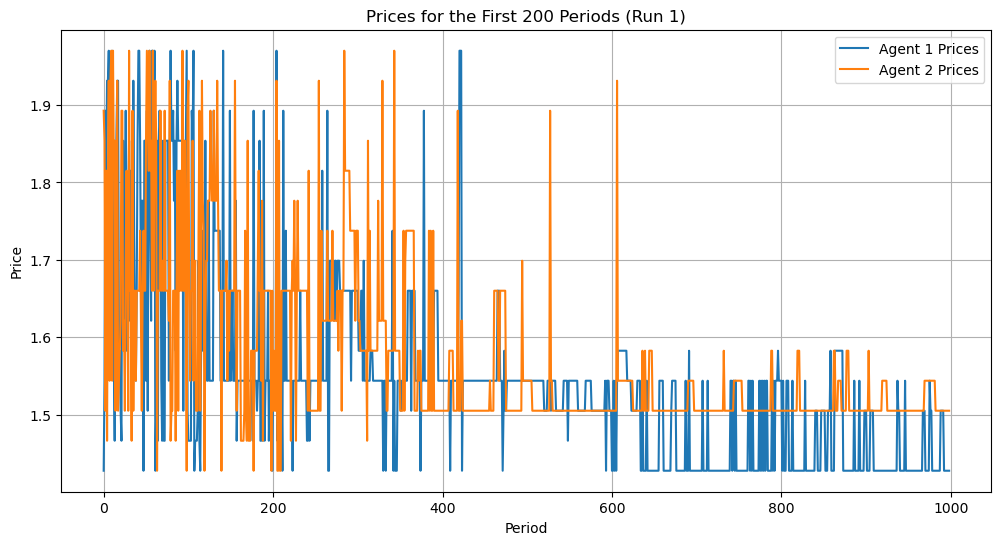

In [48]:
# Extract prices for run_1
run_1_prices = prices["run_5"]  # Shape: (periods x agents)

# Plot the first 200 periods for both agents
plt.figure(figsize=(12, 6))
plt.plot([price[0] for price in run_1_prices[:1000]], label="Agent 1 Prices")
plt.plot([price[1] for price in run_1_prices[:1000]], label="Agent 2 Prices")

# Add plot details
plt.title("Prices for the First 200 Periods (Run 1)")
plt.xlabel("Period")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()